In [200]:
import pandas as pd
import glob
import wfdb
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.signal import detrend, butter, lfilter, freqz, hilbert, find_peaks, find_peaks_cwt
from statsmodels.tsa.stattools import ccf
import seaborn as sns
from scipy import fftpack
sns.set_style("darkgrid")
%matplotlib notebook
%config InlineBackend.print_figure_kwargs={'bbox_inches': None}
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date
from IPython.display import display
from scipy.stats import norm
%matplotlib inline
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [3]:
df_master = pd.read_csv("../../../data/initial_dataset/Master_04_10_2019.csv",sep=",",low_memory=False)
df_master = df_master.drop(df_master.columns[[0,1]],1)
df_itd = pd.read_csv("../../../data/updated_dataset/ITD_merge_updated.csv",sep=",",low_memory=False)
df_itd = df_itd.drop(df_itd.columns[0],1)

In [4]:
df_master.head()

,data_pd,sample_pd.x,ASXL1,ASXL2,ASXL3,ATRX,BAGE3,BCOR,BRAF,CBFB,...,MRD_relapse_status,CRdate,randDate_PB,CRDate_PB,relapseDate_PB,boneDate_PB,longCR_PB,FLT3_ITD_New,FLT3_ITD_Value_New,NoMatchFLT3
0,PD20338c,PD20338c,0,0,0,0,0,0,0,0,...,1.0,1994-02-28,0,0,0,0,0,NaN,NaN,Missing
1,PD20337c,PD20337c,0,0,0,0,0,0,0,0,...,1.0,NaN,0,0,0,0,0,NaN,NaN,Missing
2,PD20336a,PD20336a,0,0,0,0,0,0,0,0,...,1.0,NaN,0,0,0,0,0,NaN,NaN,Missing
3,PD20335c,PD20335c,0,0,0,0,0,0,0,0,...,1.0,NaN,0,0,0,0,0,NaN,NaN,Missing
4,PD20334a,PD20334a,0,0,0,0,0,0,0,0,...,1.0,1997-07-15,0,0,0,0,0,NaN,NaN,Missing


In [24]:
### Check shape and some consistency:
#print(df_master.shape)
df_master.loc[~(df_master['data_pd'] == df_master['sample_pd.x'])]

## All those are not consistent.

(2428, 520)


,data_pd,sample_pd.x,ASXL1,ASXL2,ASXL3,ATRX,BAGE3,BCOR,BRAF,CBFB,...,MRD_relapse_status,CRdate,randDate_PB,CRDate_PB,relapseDate_PB,boneDate_PB,longCR_PB,FLT3_ITD_New,FLT3_ITD_Value_New,NoMatchFLT3
196,PD15056a,PD14961c,1,0,0,0,0,0,0,0,...,1.0,2007-09-20,0,0,0,0,0,0.0,NaN,Match
197,PD15044c,PD14973c,0,0,0,0,0,0,0,0,...,1.0,2007-08-15,0,0,0,0,0,NaN,NaN,Missing
373,PD15420a2,PD15420a,0,0,0,0,0,0,0,0,...,0.0,2011-01-19,0,0,0,0,0,0.0,NaN,Match
553,PD14996a,PD15021c,0,0,0,0,0,0,0,0,...,1.0,2007-11-01,0,0,0,0,0,0.0,NaN,Match
554,PD14984c,PD15033a,0,0,0,0,0,0,0,0,...,1.0,2007-08-10,0,0,0,0,0,NaN,NaN,Missing
1359,PD15007a,PD15010c,0,0,0,0,0,0,0,0,...,1.0,2012-10-30,0,0,0,0,0,0.0,NaN,Match
1370,PD14972c,PD15045c,0,0,0,0,0,0,0,0,...,0.0,2012-08-27,0,0,0,0,0,0.0,NaN,Match
1373,PD15043a,PD14974c,0,0,0,0,0,0,0,0,...,1.0,2012-08-24,0,0,0,0,0,0.0,NaN,Match
1374,PD14995c,PD15022a,0,0,0,0,0,0,0,0,...,1.0,2012-09-03,0,0,0,0,0,0.0,NaN,Match
1376,PD14971a,PD15046a,0,1,0,0,0,0,0,0,...,0.0,2012-09-03,0,0,0,0,0,0.0,NaN,Mismatch


In [6]:
df_merge = pd.merge(df_master,df_itd, on='data_pd', how='inner')
print (df_merge.shape)
df_merge.head()


(2427, 538)


,data_pd,sample_pd.x,ASXL1,ASXL2,ASXL3,ATRX,BAGE3,BCOR,BRAF,CBFB,...,Num_ITDs,Second_ITD,donor_id,NGS_ITD,Clin_ITD,Clin_Ratio,Merge_ITD,Merge_ITD_Ratio,Calledby,Merge_ITD_new_rules
0,PD20338c,PD20338c,0,0,0,0,0,0,0,0,...,0,.,11-3496,0.0,0.0,0.0,0.0,0,Both,0.0
1,PD20337c,PD20337c,0,0,0,0,0,0,0,0,...,0,.,11-3807,0.0,0.0,0.0,0.0,0,Both,0.0
2,PD20336a,PD20336a,0,0,0,0,0,0,0,0,...,1,.,11-3885,1.0,0.0,0.0,1.0,NaN,NGSonly,1.0
3,PD20335c,PD20335c,0,0,0,0,0,0,0,0,...,0,.,11-4052,0.0,0.0,0.0,0.0,0,Both,0.0
4,PD20334a,PD20334a,0,0,0,0,0,0,0,0,...,1,.,11-4169,1.0,0.0,0.0,1.0,NaN,NGSonly,1.0


### Look at the missing rows in Master when we merge

In [7]:
#This is the missing row 
df_master[~df_master.data_pd.isin(df_merge.data_pd.unique())]

,data_pd,sample_pd.x,ASXL1,ASXL2,ASXL3,ATRX,BAGE3,BCOR,BRAF,CBFB,...,MRD_relapse_status,CRdate,randDate_PB,CRDate_PB,relapseDate_PB,boneDate_PB,longCR_PB,FLT3_ITD_New,FLT3_ITD_Value_New,NoMatchFLT3
37,PD22517d,PD22517d,0,0,0,0,0,0,0,0,...,0.0,2004-03-02,0,0,0,0,0,NaN,NaN,Missing


### Look at the rows in ITD not in Master

From the 18 rows of the ITD dataset that I could not merge with the master dataset , 13 of them were already spotted in the ITD inconsistency analysis because sample_pd and data_pd were different

##### ITD data set rows not present in the merge dataset

In [8]:
print(df_itd[~df_itd.data_pd.isin(df_merge.data_pd.unique())].shape)
df_itd[~df_itd.data_pd.isin(df_merge.data_pd.unique())]

(18, 19)


,data_pd,sample_pd,IID,Read_count,Insertion_pt,Length,Inserted_sequence,Microhomology,NTS,Num_ITDs,Second_ITD,donor_id,NGS_ITD,Clin_ITD,Clin_Ratio,Merge_ITD,Merge_ITD_Ratio,Calledby,Merge_ITD_new_rules
3,PD15032c,PD14985a,PD14985,104.0,13:28608288,75.0,ACTACCAAACTCTAAATTTTCTCTTGGAAACTCCCATTTGAGATCA...,.,AC,4,32___13:28608273___24___TTTGAGATCATATTCATATTCT...,16-1187,1.0,NaN,NaN,1.0,na,NGS_na,1.0
4,PD15035a2,PD15035a,PD15035,185.0,13:28608286,30.0,TCATATTCATATTCTCTGAAATCAACGTAG,.,.,5,12___13:28608322___48___GAATCAACGTAGAAGTACTCAT...,17-2818,1.0,NaN,NaN,1.0,na,NGS_na,1.0
5,PD15038a,PD14979a,PD14979,61.0,13:28608319,69.0,GTGAGATCATATTCATATTCTCTGAAATCAACGTAGAAGTACTCAT...,.,G,2,12___13:28608319___57___TCATATTCTCTGAAATCAACGT...,17-2840,1.0,NaN,NaN,1.0,na,NGS_na,1.0
6,PD15028a2,PD15028a,PD15028,101.0,13:28608301,42.0,CTTTCATATTCTCTGAAATCAACGTAGAAGTACTCATTATCT,.,CT,2,7___13:28608534___380___CATTTTAAAGATTTTCCAATGG...,17-2891,1.0,NaN,NaN,1.0,na,NGS_na,1.0
7,PD14998a,PD15019c,PD15019,163.0,13:28608313,75.0,GGAAACTCCCATTTGAGATCATATTCATATTCTCTGAAATCAACGT...,.,.,1,.,17-2999,1.0,NaN,NaN,1.0,na,NGS_na,1.0
12,PD14994c,PD15023a,PD15023,8.0,13:28608281,21.0,ATTCATATTCTCTGAAATCAA,.,.,1,.,Li1-1073,1.0,NaN,NaN,1.0,na,NGS_na,0.0
55,PD20144c,PD20144c,PD20144,NaN,.,NaN,.,.,.,0,.,16-1231,0.0,NaN,NaN,0.0,NaN,NGS_na,0.0
56,PD15065c,PD15065c,PD15065,NaN,.,NaN,.,.,.,0,.,16-5833,0.0,NaN,NaN,0.0,NaN,NGS_na,0.0
57,PD19988c,PD19988c,PD19988,NaN,.,NaN,.,.,.,0,.,16-5863,0.0,NaN,NaN,0.0,NaN,NGS_na,0.0
58,PD15048a,PD15048a,PD15048,NaN,.,NaN,.,.,.,0,.,17-2823,0.0,NaN,NaN,0.0,NaN,NGS_na,0.0


In [9]:
tmp=df_itd.loc[~(df_itd['data_pd'] == df_itd['sample_pd'])]
tmp[tmp.index.isin(df_itd[~df_itd.data_pd.isin(df_merge.data_pd.unique())].index.unique())]

,data_pd,sample_pd,IID,Read_count,Insertion_pt,Length,Inserted_sequence,Microhomology,NTS,Num_ITDs,Second_ITD,donor_id,NGS_ITD,Clin_ITD,Clin_Ratio,Merge_ITD,Merge_ITD_Ratio,Calledby,Merge_ITD_new_rules
3,PD15032c,PD14985a,PD14985,104.0,13:28608288,75.0,ACTACCAAACTCTAAATTTTCTCTTGGAAACTCCCATTTGAGATCA...,.,AC,4,32___13:28608273___24___TTTGAGATCATATTCATATTCT...,16-1187,1.0,NaN,NaN,1.0,na,NGS_na,1.0
4,PD15035a2,PD15035a,PD15035,185.0,13:28608286,30.0,TCATATTCATATTCTCTGAAATCAACGTAG,.,.,5,12___13:28608322___48___GAATCAACGTAGAAGTACTCAT...,17-2818,1.0,NaN,NaN,1.0,na,NGS_na,1.0
5,PD15038a,PD14979a,PD14979,61.0,13:28608319,69.0,GTGAGATCATATTCATATTCTCTGAAATCAACGTAGAAGTACTCAT...,.,G,2,12___13:28608319___57___TCATATTCTCTGAAATCAACGT...,17-2840,1.0,NaN,NaN,1.0,na,NGS_na,1.0
6,PD15028a2,PD15028a,PD15028,101.0,13:28608301,42.0,CTTTCATATTCTCTGAAATCAACGTAGAAGTACTCATTATCT,.,CT,2,7___13:28608534___380___CATTTTAAAGATTTTCCAATGG...,17-2891,1.0,NaN,NaN,1.0,na,NGS_na,1.0
7,PD14998a,PD15019c,PD15019,163.0,13:28608313,75.0,GGAAACTCCCATTTGAGATCATATTCATATTCTCTGAAATCAACGT...,.,.,1,.,17-2999,1.0,NaN,NaN,1.0,na,NGS_na,1.0
12,PD14994c,PD15023a,PD15023,8.0,13:28608281,21.0,ATTCATATTCTCTGAAATCAA,.,.,1,.,Li1-1073,1.0,NaN,NaN,1.0,na,NGS_na,0.0
59,PD15050c,PD14967a,PD14967,NaN,.,NaN,.,.,.,0,.,17-2855,0.0,NaN,NaN,0.0,NaN,NGS_na,0.0
60,PD15050c2,PD15050c,PD15050,NaN,.,NaN,.,.,.,0,.,17-2857,0.0,NaN,NaN,0.0,NaN,NGS_na,0.0
62,PD15048c,PD14969a,PD14969,NaN,.,NaN,.,.,.,0,.,17-2887,0.0,NaN,NaN,0.0,NaN,NGS_na,0.0
99,PD15055c,PD14962c,PD14962,NaN,.,NaN,.,.,.,0,.,LI1-1074,0.0,NaN,NaN,0.0,NaN,NGS_na,0.0


In [10]:
df_master.corr()
#import matplotlib.pyplot as plt
#import seaborn as sns
#corr = df_master.corr()
#sns.heatmap(corr, annot=True,)

,ASXL1,ASXL2,ASXL3,ATRX,BAGE3,BCOR,BRAF,CBFB,CBL,CDKN2A,...,MRD_Status,MRD_relapse,MRD_relapse_status,randDate_PB,CRDate_PB,relapseDate_PB,boneDate_PB,longCR_PB,FLT3_ITD_New,FLT3_ITD_Value_New
ASXL1,1.000000,-0.021844,-0.008719,0.018317,-0.000278,0.032087,0.030229,0.024190,0.064699,0.060717,...,0.111524,-0.078597,0.083496,-0.016329,-0.010681,-0.020486,-0.027675,0.003103,-0.087302,-0.104160
ASXL2,-0.021844,1.000000,-0.004078,0.030123,0.032181,-0.003021,-0.008662,-0.005769,0.038771,-0.005769,...,-0.018139,0.063970,-0.037342,-0.007636,-0.004995,-0.009581,-0.012943,0.030261,-0.042089,-0.035454
ASXL3,-0.008719,-0.004078,1.000000,-0.002107,-0.002024,-0.006314,-0.001751,-0.001166,-0.004330,-0.001166,...,-0.009975,0.013834,-0.015950,-0.001544,-0.001010,-0.001937,-0.002617,-0.004837,-0.011841,NaN
ATRX,0.018317,0.030123,-0.002107,1.000000,-0.005171,0.037676,-0.004475,-0.002980,-0.011065,-0.002980,...,0.029233,-0.005586,0.031337,-0.003945,-0.002581,-0.004950,-0.006687,-0.012360,-0.031377,NaN
BAGE3,-0.000278,0.032181,-0.002024,-0.005171,1.000000,-0.015498,-0.004299,-0.002863,-0.010629,-0.002863,...,0.000824,0.010851,-0.011871,-0.003790,-0.002479,-0.004754,-0.006423,-0.011872,-0.022843,-0.025451
BCOR,0.032087,-0.003021,-0.006314,0.037676,-0.015498,1.000000,0.018896,0.039481,-0.019851,-0.008933,...,0.078000,-0.050662,0.072228,-0.011825,-0.007735,-0.014835,-0.020041,-0.013072,-0.005026,-0.086945
BRAF,0.030229,-0.008662,-0.001751,-0.004475,-0.004299,0.018896,1.000000,-0.002478,-0.009199,-0.002478,...,0.029919,-0.014408,0.021208,-0.003280,-0.002145,-0.004115,-0.005559,-0.010275,-0.002024,-0.007587
CBFB,0.024190,-0.005769,-0.001166,-0.002980,-0.002863,0.039481,-0.002478,1.000000,-0.006127,-0.001650,...,0.007769,0.003523,0.024606,-0.002184,-0.001429,-0.002740,-0.003702,-0.006843,0.003663,-0.021965
CBL,0.064699,0.038771,-0.004330,-0.011065,-0.010629,-0.019851,-0.009199,-0.006127,1.000000,-0.006127,...,0.014094,0.031537,-0.004661,0.043982,-0.005305,-0.010175,0.048056,-0.008356,-0.039113,-0.091940
CDKN2A,0.060717,-0.005769,-0.001166,-0.002980,-0.002863,-0.008933,-0.002478,-0.001650,-0.006127,1.000000,...,0.007769,-0.017569,0.001020,-0.002184,-0.001429,-0.002740,-0.003702,-0.006843,-0.023701,NaN


### Look at the description of the dataset to understand better

In [11]:
desc = df_merge.describe()
desc

,ASXL1,ASXL2,ASXL3,ATRX,BAGE3,BCOR,BRAF,CBFB,CBL,CDKN2A,...,longCR_PB,FLT3_ITD_New,FLT3_ITD_Value_New,Read_count,Length,NGS_ITD,Clin_ITD,Clin_Ratio,Merge_ITD,Merge_ITD_new_rules
count,2427.000000,2427.000000,2427.000000,2427.000000,2427.000000,2427.000000,2427.000000,2427.000000,2427.000000,2427.000000,...,2427.000000,1972.000000,415.000000,599.000000,599.000000,2402.000000,2151.000000,2151.000000,2427.000000,2427.000000
mean,0.084466,0.019778,0.000824,0.005356,0.004944,0.046148,0.003708,0.001648,0.022250,0.001648,...,0.027606,0.216531,35.482892,114.323873,59.834725,0.249376,0.198512,6.845839,0.262052,0.208076
std,0.278143,0.139264,0.028701,0.073006,0.070157,0.209848,0.060795,0.040572,0.147525,0.040572,...,0.163875,0.411985,22.587821,89.729109,51.055721,0.432742,0.398973,17.157531,0.439841,0.406015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,5.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,18.950000,36.500000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,31.000000,105.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,43.650000,168.000000,72.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,118.000000,517.000000,618.000000,1.000000,1.000000,118.000000,1.000000,1.000000


##### Look at the gene features first

In [631]:
df_gene = df_merge.loc[:,'ASXL1':'ZRSR2']
#df_gene.reset_index(inplace=True)
df_gene.tail()
#df_gene.shape

,ASXL1,ASXL2,ASXL3,ATRX,BAGE3,BCOR,BRAF,CBFB,CBL,CDKN2A,...,SPP1,SRSF2,STAG2,STAT5B,SUZ12,TET2,TP53,U2AF1,WT1,ZRSR2
2422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2423,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
2424,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2425,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [632]:
print(df_gene.describe())
df_gene.sum().sort_values()
des = df_gene.describe()
##Verify that there is no na()
print((des[des.index=='count'].sum(1)/len(des.columns))==len(df_gene))
df_gene.to_csv("../../../data/updated_dataset/merge_gene_updated.csv",sep=",")

             ASXL1        ASXL2        ASXL3         ATRX        BAGE3  \
count  2427.000000  2427.000000  2427.000000  2427.000000  2427.000000   
mean      0.084466     0.019778     0.000824     0.005356     0.004944   
std       0.278143     0.139264     0.028701     0.073006     0.070157   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              BCOR         BRAF         CBFB          CBL       CDKN2A  \
count  2427.000000  2427.000000  2427.000000  2427.000000  2427.000000   
mean      0.046148     0.003708     0.001648     0.022250     0.001648   
std       0.209848     0.060795     0.040572     0.147525     0.040572   
min       0.000000     0.000000     0

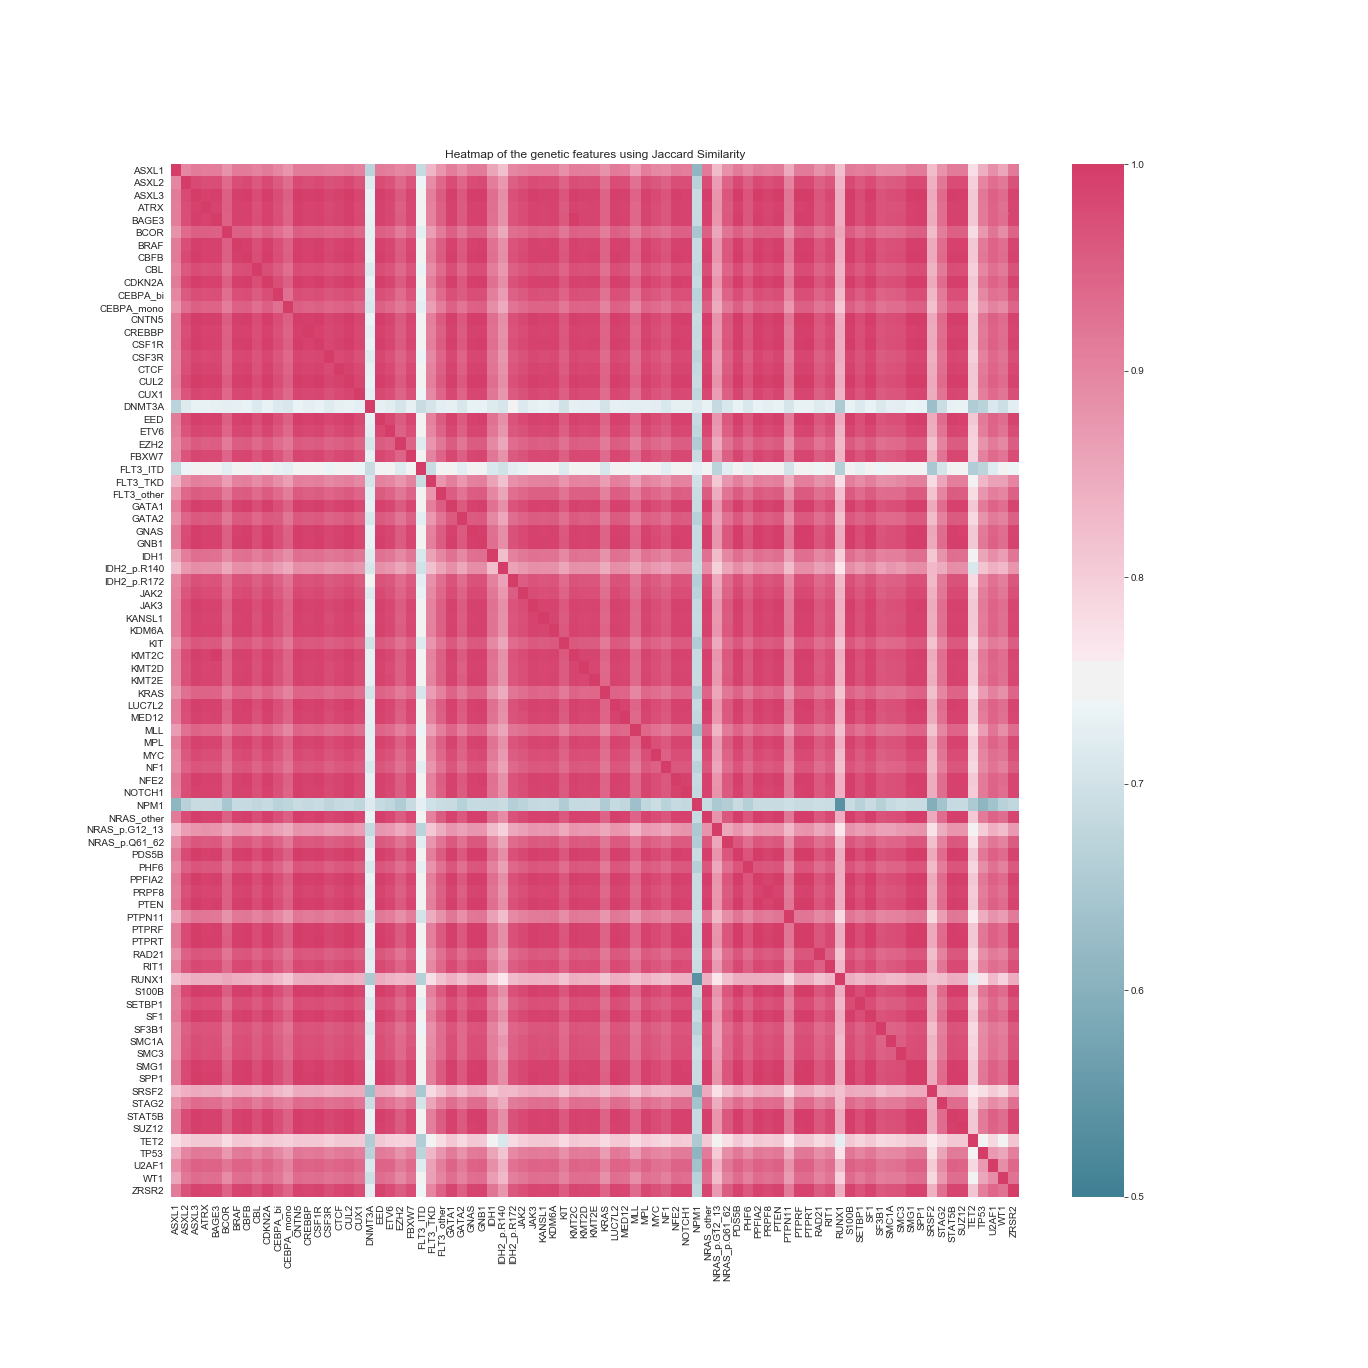

In [633]:
jac_sim = 1 - pairwise_distances(df_gene.T, metric = "hamming")
jac_sim = pd.DataFrame(jac_sim, index=df_gene.columns, columns=df_gene.columns)
from matplotlib.colors import ListedColormap
plt.figure(figsize=(19,19))
plt.title('Heatmap of the genetic features using Jaccard Similarity')
#sns.heatmap(jac_sim,vmin=0.5,vmax=1,cmap=sns.diverging_palette(220, 10, as_cmap=True))
sns.heatmap(jac_sim,vmin=0.5,vmax=1,cmap=sns.diverging_palette(220,0,as_cmap=True))
#sns.heatmap(jac_sim,vmin=0.5,vmax=1,cmap=sns.diverging_palette(220,0,as_cmap=True))
plt.show()

## Clustering with elbow method

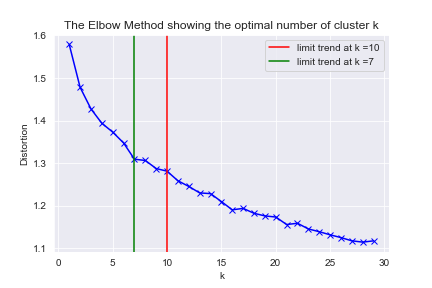

In [634]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
distortions = []
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=123).fit(df_gene)
    kmeanModel.fit(df_gene)
    distortions.append(np.sum(np.min(cdist(df_gene, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_gene.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal number of cluster k')
plt.axvline(x=10, label='limit trend at k ={}'.format(10), c='r')
plt.axvline(x=7, label='limit trend at k ={}'.format(7), c='g')
plt.legend()
plt.show()

In [635]:
model = KMeans(n_clusters=10).fit(df_gene)
model.fit(df_gene)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### Let's look at how many patients per cluster

In [636]:
from collections import Counter
dict(Counter(model.labels_))

{3: 161,
 2: 713,
 0: 161,
 9: 186,
 4: 433,
 1: 184,
 8: 159,
 7: 141,
 6: 109,
 5: 180}

In [637]:
y_train = [1 if m == 0 else 0 for m in model.labels_]
l=list(model.labels_)
#Check if association works
[index for index, value in enumerate(l) if value == 0]==[index for index, value in enumerate(y_train) if value == 1]

True

### Let's look at the feature importance using kMeans

In [638]:
y = [1 if m == 1 else 0 for m in model.labels_]
#print(len(y==1))
l=list(model.labels_)
X_train, X_test, y_train, y_test = train_test_split(df_gene, y, test_size=0.3, random_state=0)
clf = RandomForestClassifier(n_estimators=500, random_state=0, n_jobs=-1)
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

1.0

2427
True


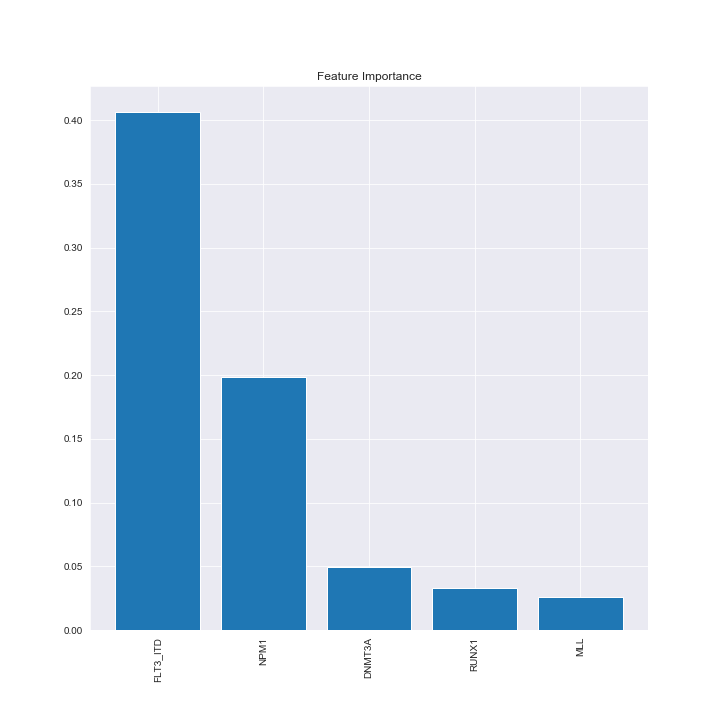

2427
True


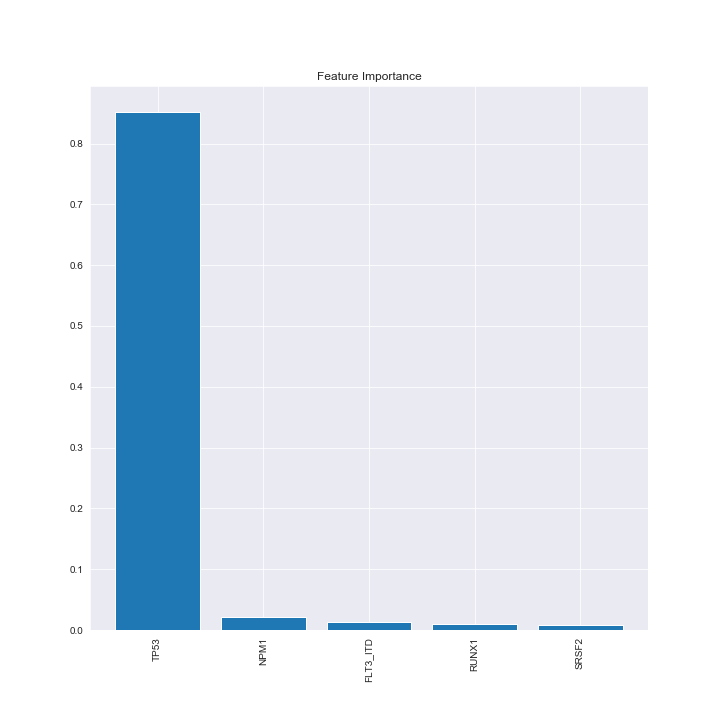

2427
True


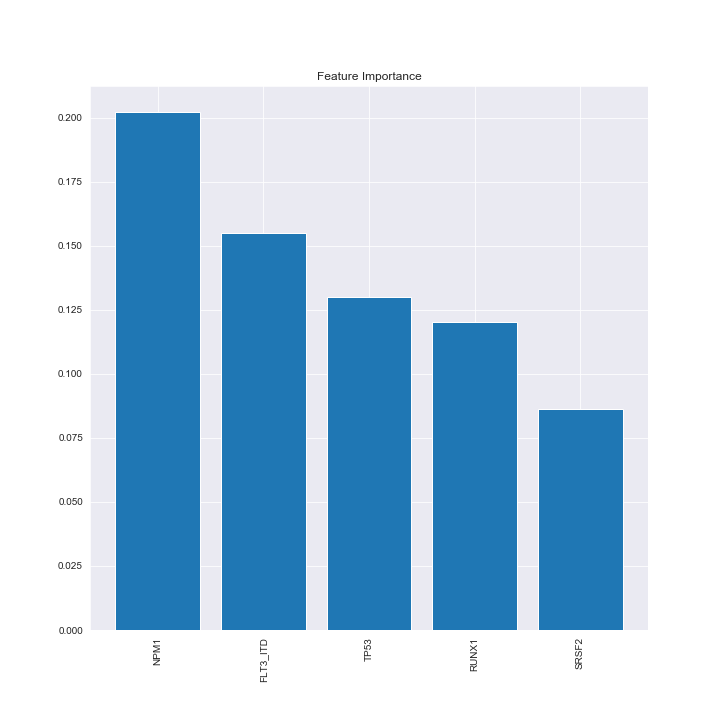

2427
True


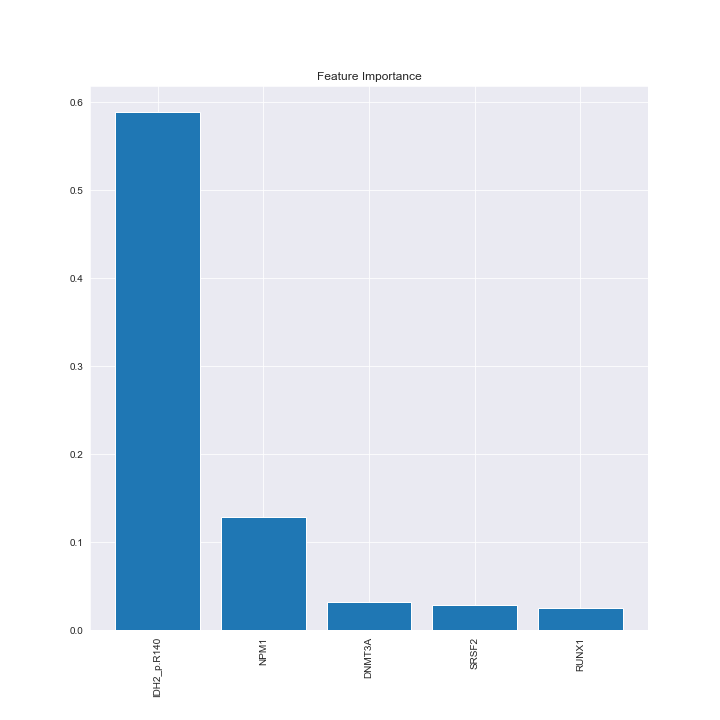

2427
True


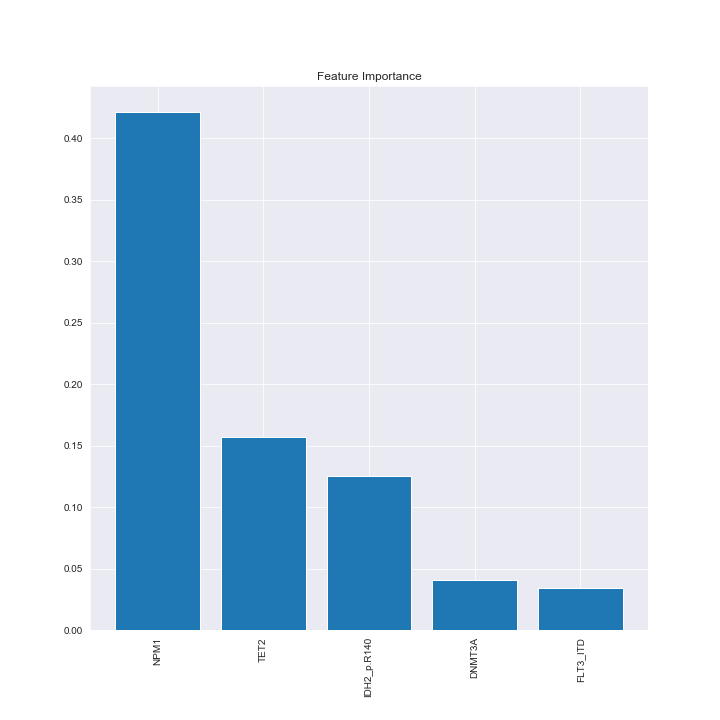

2427
True


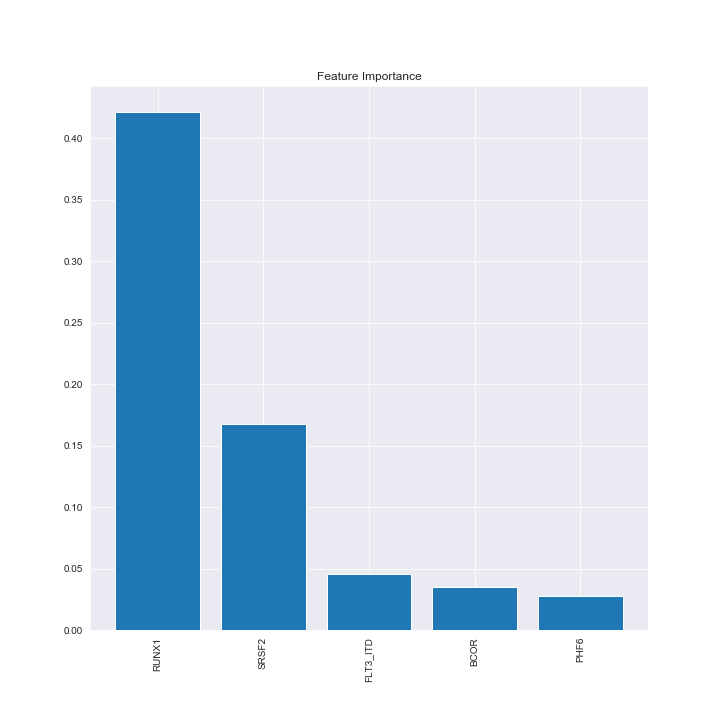

2427
True


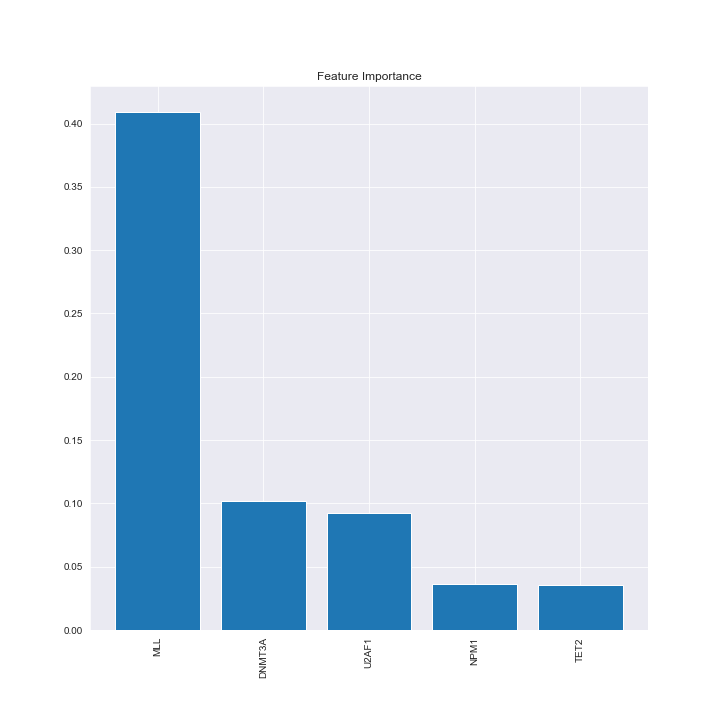

2427
True


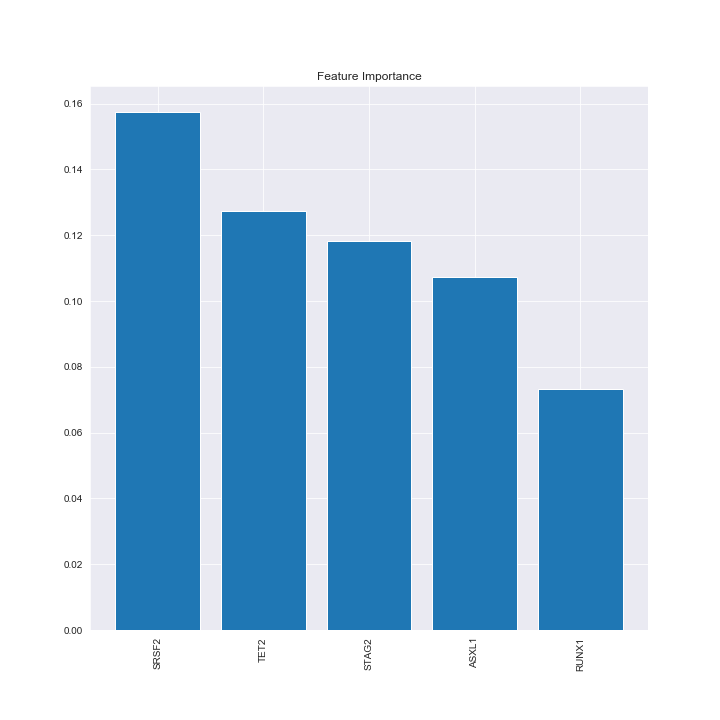

2427
True


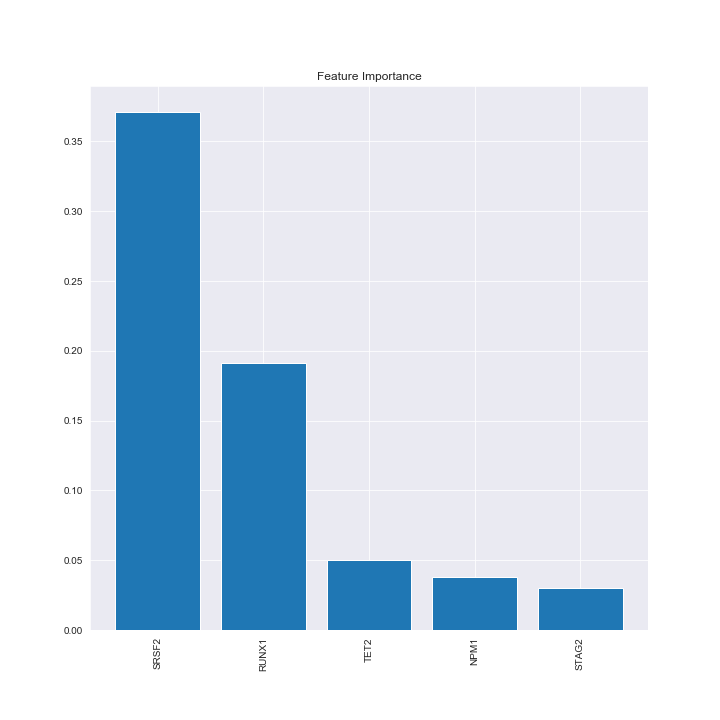

2427
True


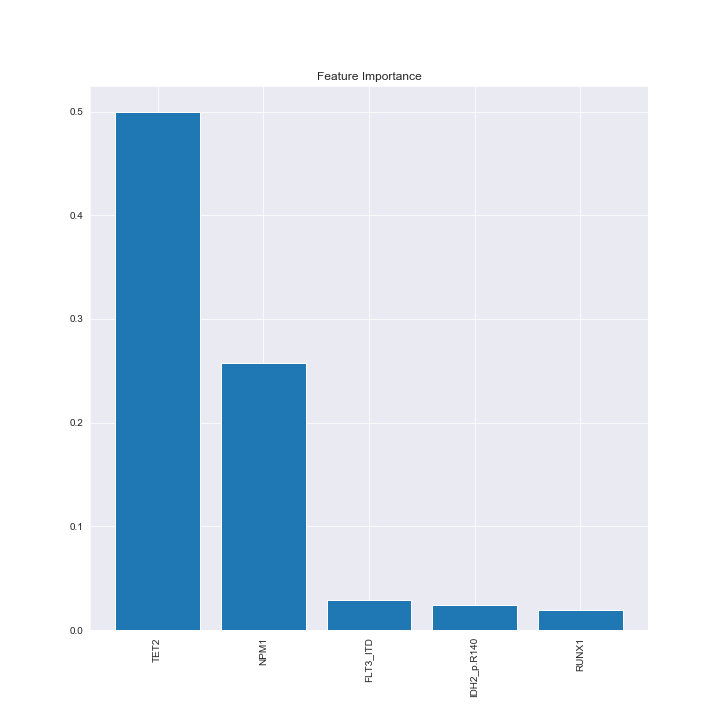

In [639]:
for i in range(10):
    y = [1 if m == i else 0 for m in model.labels_]
    l=list(model.labels_)
    print (len(l))
    #print([index for index, value in enumerate(l) if value == i])
    #print([index for index, value in enumerate(y) if value == 1])
    
    #Check if association works
    print([index for index, value in enumerate(l) if value == i]==[index for index, value in enumerate(y) if value == 1])
    X_train, X_test, y_train, y_test = train_test_split(df_gene, y, test_size=0.3, random_state=0)
    # Train the classifier
    clf = RandomForestClassifier(n_estimators=500, random_state=0, n_jobs=-1)
    #clf.fit(X_train, y_train)
    clf.fit(df_gene, y)

    # Print the name and gini importance of each feature (verify that sum is 1)
    importances = clf.feature_importances_
    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]
    #print (df_gene.columns[65])
    #print (indices[:5])
    indices=indices[:5]
    # Rearrange feature names so they match the sorted feature importances
    names = [df_gene.columns[i] for i in indices]
    plt.figure(figsize=(10,10))
    # Create plot title
    plt.title("Feature Importance")

    # Add bars
    plt.bar(range(5), importances[indices])

    # Add feature names as x-axis labels
    plt.xticks(range(5), names, rotation=90)

    # Show plot
    plt.show()

In [640]:
sum=0
for feature in zip(df_gene.columns, clf.feature_importances_):
    if feature[1]>0.03:
        print (feature)
    else: pass
    sum+= feature[1]


('NPM1', 0.2578075906020872)
('TET2', 0.49937758791128345)


The distortion score computes the squared sum distance between each point and its centroid cluster. It is decreasing obviously as we increase the number of clusters

#### Mean Shift Clustering Algorithm

In [641]:
from sklearn.cluster import MeanShift
ms = MeanShift().fit(df_gene)


In [642]:
from sklearn.preprocessing import MinMaxScaler
#X = MinMaxScaler().fit_transform(df_gene)
#X
import sklearn
ms = MeanShift(bandwidth=sklearn.cluster.estimate_bandwidth(X,quantile=0.2)).fit(X)

In [643]:

labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 14


In [644]:
from collections import Counter
dict(Counter(ms.labels_))

{0: 2358,
 8: 5,
 4: 3,
 11: 1,
 2: 7,
 6: 2,
 3: 5,
 5: 1,
 12: 1,
 9: 1,
 1: 2,
 13: 1,
 7: 1,
 10: 1}


### DB Scan Clustering

In [645]:
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
from sklearn.neighbors import DistanceMetric


import pandas as pd
import numpy as np
from sklearn.neighbors import DistanceMetric


def gower_distance(X):
    """
    This function expects a pandas dataframe as input
    The data frame is to contain the features along the columns. Based on these features a
    distance matrix will be returned which will contain the pairwise gower distance between the rows
    All variables of object type will be treated as nominal variables and the others will be treated as 
    numeric variables.
    Distance metrics used for:
    Nominal variables: Dice distance (https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient)
    Numeric variables: Manhattan distance normalized by the range of the variable (https://en.wikipedia.org/wiki/Taxicab_geometry)
    """
    individual_variable_distances = []

    for i in range(X.shape[1]):
        feature = X.iloc[:,[i]]
        if feature.dtypes[0] == np.object:
            feature_dist = DistanceMetric.get_metric('dice').pairwise(pd.get_dummies(feature))
        else:
            feature_dist = DistanceMetric.get_metric('manhattan').pairwise(feature) / max(np.ptp(feature.values),1)

        individual_variable_distances.append(feature_dist)

    return np.array(individual_variable_distances).mean(0)
clustering = DBSCAN().fit(df_gene)

In [646]:
dict(Counter(clustering.labels_))

{0: 12,
 1: 13,
 -1: 1685,
 2: 7,
 3: 6,
 4: 21,
 5: 7,
 6: 78,
 7: 22,
 8: 9,
 9: 5,
 10: 10,
 11: 5,
 12: 16,
 13: 153,
 14: 50,
 15: 12,
 16: 15,
 17: 14,
 18: 7,
 19: 16,
 20: 23,
 21: 6,
 22: 6,
 23: 33,
 24: 7,
 25: 7,
 26: 5,
 27: 5,
 28: 14,
 29: 6,
 30: 6,
 31: 13,
 32: 8,
 33: 14,
 34: 7,
 35: 9,
 36: 6,
 37: 7,
 38: 8,
 39: 6,
 40: 5,
 41: 6,
 42: 6,
 43: 9,
 44: 11,
 45: 7,
 46: 9,
 47: 5,
 48: 5,
 49: 5}

#### Include also translocation features

### DataFrame to use

In [654]:
df_w_transloc = df_merge.loc[:,'ASXL1':'ZRSR2']
df_w_transloc=df_w_transloc.join(df_merge.loc[:,'t_v_11':'complex'])
#print(df_w_transloc.shape)
df_w_transloc = df_w_transloc[~df_w_transloc.t_13_19.isna()]  # get rid of na (249 of transloc)
print (df_w_transloc )
#df_w_transloc.reset_index(inplace=True)
#df_merge.tail()
#df_w_transloc.to_csv("../../../data/updated_dataset/merge_gene_w_transloc_updated.csv",sep=",")

      ASXL1  ASXL2  ASXL3  ATRX  BAGE3  BCOR  BRAF  CBFB  CBL  CDKN2A  \
0         0      0      0     0      0     0     0     0    0       0   
1         0      0      0     0      0     0     0     0    0       0   
2         0      0      0     0      0     0     0     0    0       0   
3         0      0      0     0      0     0     0     0    0       0   
4         0      0      0     0      0     0     0     0    0       0   
5         0      0      0     0      0     0     0     0    0       0   
6         0      0      0     0      0     0     0     0    0       0   
7         0      0      0     0      0     0     0     0    0       0   
8         0      0      0     0      0     0     0     0    0       0   
9         0      0      0     0      0     0     0     0    0       0   
10        0      0      0     0      0     0     0     0    0       0   
11        0      0      0     0      0     0     0     0    0       0   
12        0      0      0     0      0     0     0 

#### Check total dislocations

In [649]:
#temp = pd.DataFrame(df_w_transloc.loc[:,'t_v_11':'complex'].describe().ix['max'])
#temp[temp['max']==0]
temp=df_w_transloc.loc[:,'t_v_11':'complex']
temp.loc['Total']=temp.sum()
#temp.loc['Total'].mean()
#temp=pd.DataFrame(temp.loc['Total'][temp.loc['Total']>temp.loc['Total'].mean()]) 
pd.DataFrame(temp.loc['Total'][temp.loc['Total']==0])
#keep only the ones present for more than mean overall=9.9 patients
#temp

,Total
del_13p,0.0
del_15p,0.0
del_18p,0.0
del_18q,0.0
dic_13_14,0.0
minus7.,0.0
t_17_22,0.0


In [653]:

temp=df_w_transloc.loc[:,'t_v_11':'complex']
temp.loc['High_Freq(>2%)']=(df_w_transloc.loc[:,'t_v_11':'complex'].sum()/df_w_transloc.shape[0])*100
freq=pd.DataFrame(temp.loc['High_Freq(>2%)'].T)
high_freq=freq[freq['High_Freq(>2%)']>=2]
high_freq

2150


,High_Freq(>2%)
t_v_11,2.976744
del_5q,4.511628
del_7q,2.976744
del_9q,2.418605
inv_16,4.372093
mar,6.930233
minus17,3.302326
minus18,2.604651
minus5,2.604651
minus7,5.720930


### Addition

In [590]:
add=df_w_transloc.loc[:,'add_10p':'add_xq']
add=pd.concat([add,df_w_transloc.loc[:,'plus1':'plusy']],1)
lis=[1,2,3,4,5,6,7,9,10,12,13,14,15,16,17,18,19,20]
li=[8,11,21,22]
for l in lis:
    add['add_'+str(l)+'_merge']=add['add_'+str(l)+'p']+add['add_'+str(l)+'q']+add['plus'+str(l)]
    add.drop(['add_'+str(l)+'p','add_'+str(l)+'q','plus'+str(l)], axis=1,inplace=True)
for l in li:
    add['add_'+str(l)+'_merge']=add['add_'+str(l)+'p']+add['add_'+str(l)+'q']
    add.drop(['add_'+str(l)+'p','add_'+str(l)+'q'], axis=1,inplace=True)
add['add_merge_x_y']=add['add_xp']+add['add_xq']+add['plusx']+add['plusy']    
add.drop(['add_xp','add_xq','plusx','plusy'], axis=1,inplace=True)
#add.head()

### Deletion

In [603]:
deletion = df_w_transloc.loc[:,'del_10p':'del_xq']
deletion=pd.concat([deletion,df_w_transloc.loc[:,'minus1':'minusy']],1)
deletion.drop(['minus7.'],1,inplace=True) # weird column
lis=[1,2,3,6,8,10,11,12,13,15,16,19]
for i in [4,14,20,21,22]:
    deletion['del_'+str(i)+'_merge']=deletion['del_'+str(i)+'q']+deletion['minus'+str(i)]
    deletion.drop(['del_'+str(i)+'q','minus'+str(i)], axis=1,inplace=True)

for l in lis:
    deletion['del_'+str(l)+'_merge']=deletion['del_'+str(l)+'p']+deletion['del_'+str(l)+'q']+deletion['minus'+str(l)]
    deletion.drop(['del_'+str(l)+'p','del_'+str(l)+'q','minus'+str(l)], axis=1,inplace=True)

for i in [5,7]:
    deletion.drop(['del_'+str(i)+'p'], axis=1,inplace=True)

for l in [17,18]:
    deletion['del_'+str(l)+'_merge']=deletion['del_'+str(l)+'p']+deletion['del_'+str(l)+'q']
    deletion.drop(['del_'+str(l)+'p','del_'+str(l)+'q'], axis=1,inplace=True)
    
deletion['del_'+str(9)+'_merge']=deletion['del_'+str(9)+'p']+deletion['minus'+str(9)]
deletion.drop(['del_'+str(9)+'p','minus'+str(9)], axis=1,inplace=True)

deletion['del_merge_x_y']=deletion['del_xq']+deletion['minusx']  
deletion.drop(['del_xq','minusx'], axis=1,inplace=True)
deletion.head()

,del_5q,del_7q,del_9q,minus17,minus18,minus5,minus7,minusy,del_4_merge,del_14_merge,...,del_11_merge,del_12_merge,del_13_merge,del_15_merge,del_16_merge,del_19_merge,del_17_merge,del_18_merge,del_9_merge,del_merge_x_y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
add=pd.concat([add,df_w_transloc.loc[:,'plus1':'plusy']],1)
#add.loc[:,'add_10p':'plusy'].sum()/add.shape[0])*100
#add=pd.DataFrame(add.loc[:,'add_10p':'plusy'].sum()/add.shape[0])*100)
lis=[1,2,3,4,6,8,10,11,12,13,14,15,16,19,20,21,22]
#li=[8,11,21,22]
for l in lis:
    add['add_'+str(l)+'_merge']=add['add_'+str(l)+'p']+add['add_'+str(l)+'q']+add['plus'+str(l)]
    add.drop(['add_'+str(l)+'p','add_'+str(l)+'q','plus'+str(l)], axis=1,inplace=True)
for l in li:
    add['add_'+str(l)+'_merge']=add['add_'+str(l)+'p']+add['add_'+str(l)+'q']
    add.drop(['add_'+str(l)+'p','add_'+str(l)+'q'], axis=1,inplace=True)
add['add_merge_x_y']=add['add_xp']+add['add_xq']+add['plusx']+add['plusy']    
add.drop(['add_xp','add_xq','plusx','plusy'], axis=1,inplace=True)
add.head()

In [390]:
jac_sim = 1 - pairwise_distances(df_w_transloc.T, metric = "hamming")
jac_sim = pd.DataFrame(jac_sim, index=df_w_transloc.columns, columns=df_w_transloc.columns)
from matplotlib.colors import ListedColormap
plt.figure(figsize=(100,100))
plt.title('Heatmap of the genetic features using Jaccard Similarity')
#sns.heatmap(jac_sim,vmin=0.5,vmax=1,cmap=sns.diverging_palette(220, 10, as_cmap=True))
sns.heatmap(jac_sim,vmin=0,vmax=1)
plt.show()

#### Clustering with the translocations

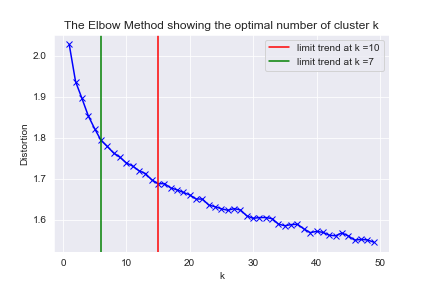

In [437]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
distortions = []
K = range(1,50) #30
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=123).fit(df_w_transloc)
    kmeanModel.fit(df_w_transloc)
    distortions.append(np.sum((np.min(cdist(df_w_transloc, kmeanModel.cluster_centers_, 'euclidean'), axis=1)))/ df_w_transloc.shape[0])
    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal number of cluster k')
plt.axvline(x=15, label='limit trend at k ={}'.format(10), c='r')
plt.axvline(x=6, label='limit trend at k ={}'.format(7), c='g')
plt.legend()
plt.show()

In [432]:
model = KMeans(n_clusters=6).fit(df_gene)
model.fit(df_gene)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [433]:
from collections import Counter
dict(Counter(model.labels_))

{1: 393, 0: 261, 2: 456, 3: 657, 4: 350, 5: 272}

In [434]:
y = [1 if m == 1 else 0 for m in model.labels_]
#print(len(y==1))
l=list(model.labels_)
X_train, X_test, y_train, y_test = train_test_split(df_gene, y, test_size=0.3, random_state=0)
clf = RandomForestClassifier(n_estimators=500, random_state=0, n_jobs=-1)
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

1.0

True


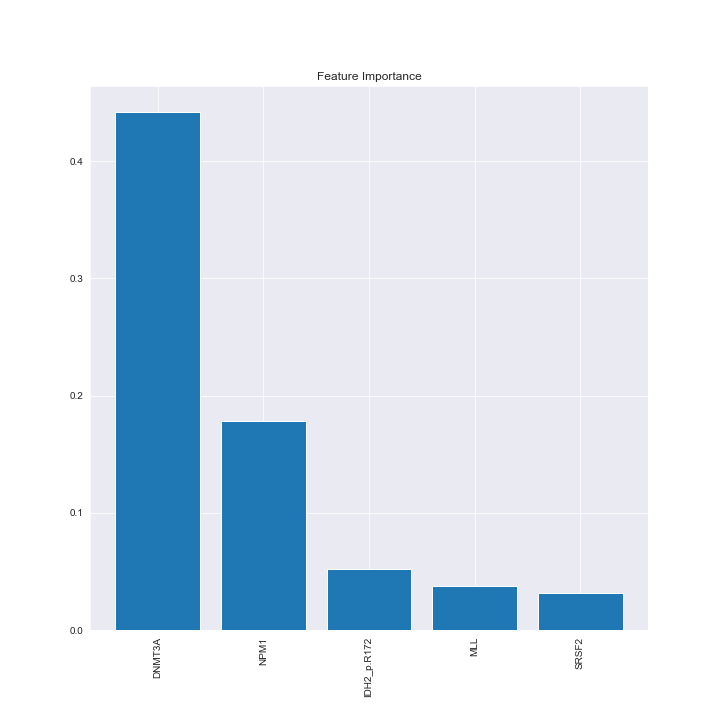

True


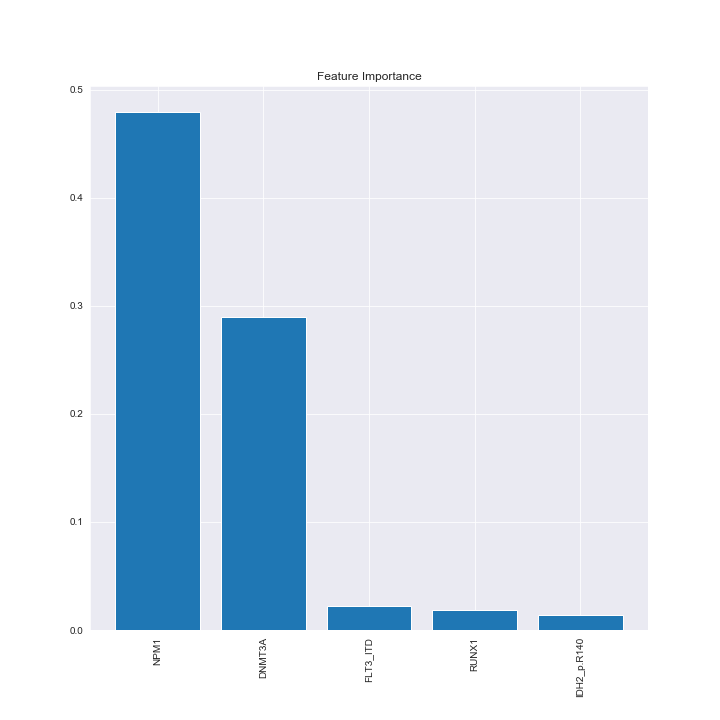

True


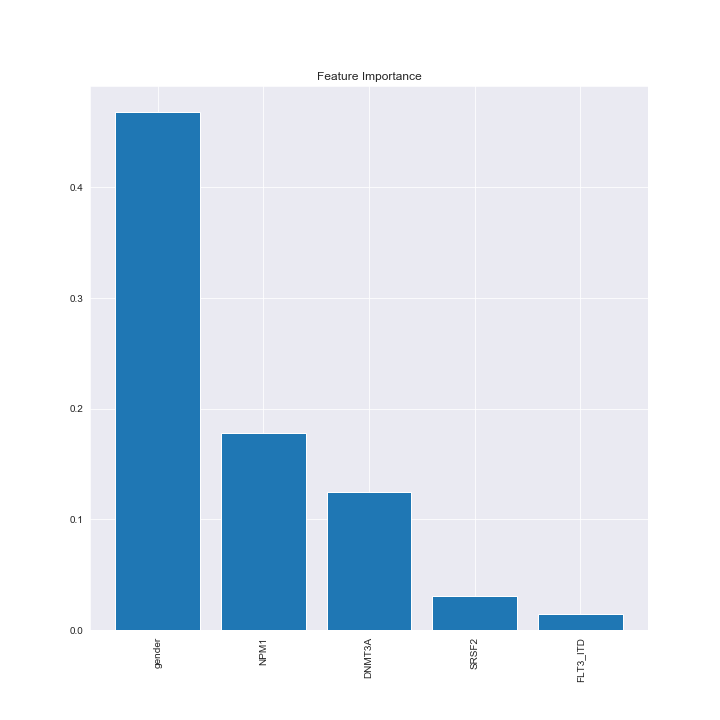

True


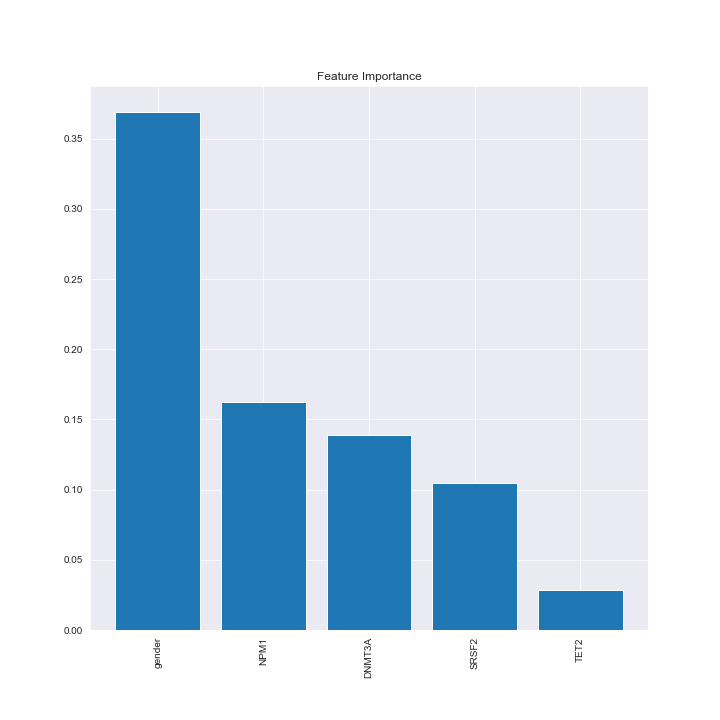

True


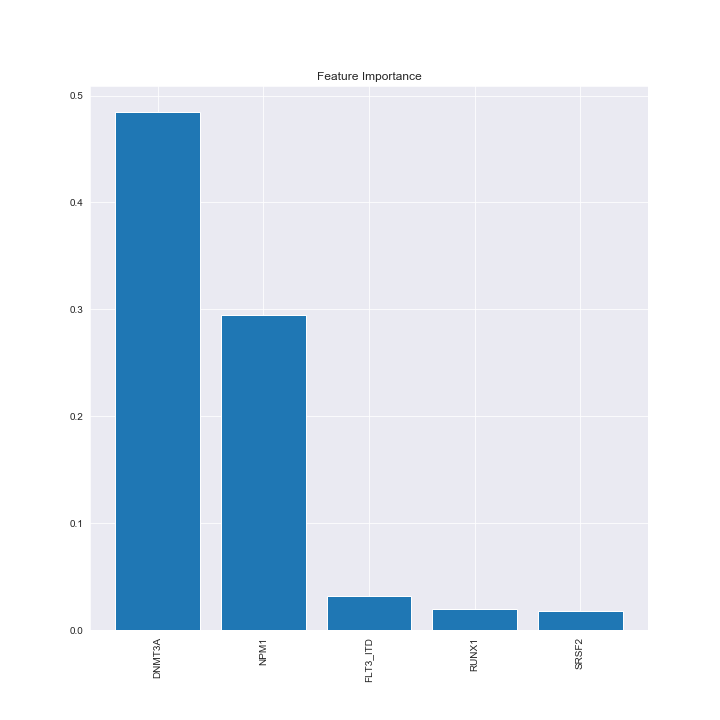

True


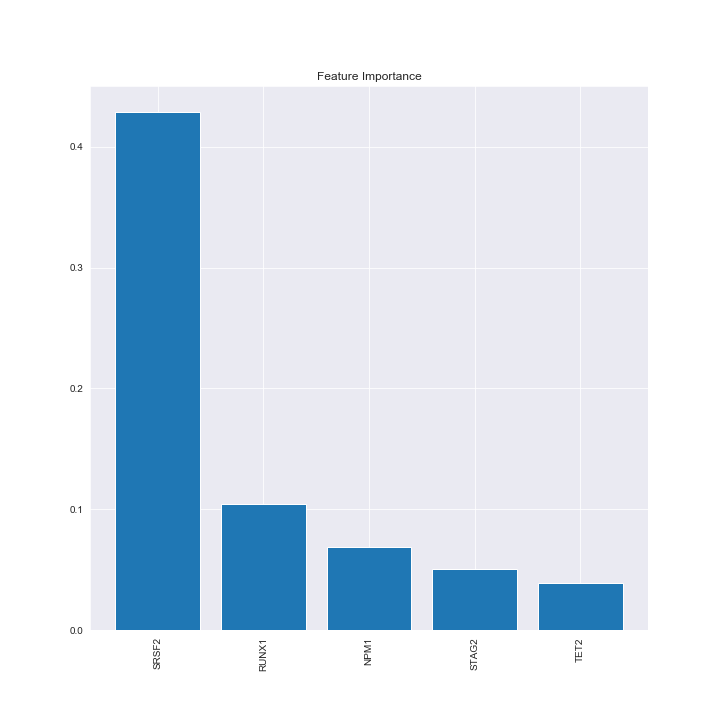

In [436]:
for i in range(6):
    y = [1 if m == i else 0 for m in model.labels_]
    l=list(model.labels_)
    #print([index for index, value in enumerate(l) if value == i])
    #print([index for index, value in enumerate(y) if value == 1])
    
    #Check if association works
    print([index for index, value in enumerate(l) if value == i]==[index for index, value in enumerate(y) if value == 1])
    X_train, X_test, y_train, y_test = train_test_split(df_gene, y, test_size=0.3, random_state=0)
    # Train the classifier
    clf = RandomForestClassifier(n_estimators=500, random_state=0, n_jobs=-1)
    #clf.fit(X_train, y_train)
    clf.fit(X, y)

    # Print the name and gini importance of each feature (verify that sum is 1)
    importances = clf.feature_importances_
    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]
    #print (df_gene.columns[65])
    #print (indices[:5])
    indices=indices[:5]
    # Rearrange feature names so they match the sorted feature importances
    names = [df_gene.columns[i] for i in indices]
    plt.figure(figsize=(10,10))
    # Create plot title
    plt.title("Feature Importance")

    # Add bars
    plt.bar(range(5), importances[indices])

    # Add feature names as x-axis labels
    plt.xticks(range(5), names, rotation=90)

    # Show plot
    plt.show()



#### Check consistency by looking at the max and min of each of those columns (most of them will have max=1 and min=0 : let's make sure)

"\n# Plot the elbow\nplt.plot(K, distortions, 'bx-')\nplt.xlabel('k')\nplt.ylabel('Distortion')\nplt.title('The Elbow Method showing the optimal number of cluster k')\nplt.axvline(x=10, label='limit trend at k ={}'.format(10), c='r')\nplt.axvline(x=7, label='limit trend at k ={}'.format(7), c='g')\nplt.legend()\nplt.show()\n"

##### We start by looking at the max:

In [ ]:
desc.iloc[7][desc.iloc[7]>1]
#Fine! All those features can be greater than one!

In [ ]:
desc.iloc[7][desc.iloc[7]<1]
# Interesting! No one has this

##### Now, we look at the min:

In [ ]:
desc.iloc[3][desc.iloc[3]<0]
# What is variable "os"?
#df_master[df_master.os<0]
df_master.os

In [ ]:
df_master.isna().sum()